# Notebook 8: Downplunge projection

Folds normally have a cylindrical symmetry; the layers are bent about a single axis or direction, called the fold axis. The least distorted view of the fold is on the plane perpendicular to the fold axis, which is called the profile plane (Figure below, modified from Allmendinger et al., 2012). Projecting the fold data to this profile plane is called a downplunge projection.

Constructing a downplunge projection by hand is complicated. Fortunately, we can solve this problem as a coordinate transformation, where points on the fold referenced in a ENU coordinate system, are transformed to a new X1′X2′X3′ coordinate system, with X3′ parallel to the fold axis, and X1′X2′ defining the profile plane (Figure below).

<img src="../figures/downplunge.png" alt="downplunge" width="750" style="display: block; margin: 0 auto"/><br><br>

Without demonstration (see [Cardozo et al.](https://github.com/nfcd/compGeo), section 5.2.3 for that), the matrix, $\mathbf{a}$, defining this transformation is:

$$\mathbf{a}=\left[\begin{array}{ccc}
\sin (\text { trend }) \sin (\text { plunge }) & \cos (\text { trend }) \sin (\text { plunge }) & \cos (\text { plunge }) \\
\cos (\text { trend }) & -\sin (\text { trend }) & 0 \\
\sin (\text { trend }) \cos (\text { plunge }) & \cos (\text { trend }) \cos (\text { plunge }) & -\sin (\text { plunge })
\end{array}\right]$$

where trend and plunge are the orientation of the fold axis. To project points with coordinates ENU downplunge, we just need to transform the points to the X1'X2'X3' coordinate system, and plot X2' versus X1' to get the profile plane.


## Python function

Function [down_plunge](../functions/down_plunge.py) computes the downplunge projection of a bed from the ENU coordinates of points on the bed, and the fold axis orientation.

## Application

The Broadhaven fold is a thrust-related fold in SW Wales ([Cawood and Bond, 2019](https://www.lyellcollection.org/doi/full/10.1144/SP487.11)). The data/Broadhaven folder contains 9 layers from an [interpretation](https://sketchfab.com/3d-models/broadhaven-interpretation-8fdac3ac03604c59b2ac3acc9701489b) of a [3D virtual model](https://sketchfab.com/3d-models/broadhaven-81a1a6ab7941426d976e7d7fa5b025d8)  of the fold. File layer1.txt is the oldest layer, and layer9.txt is the youngest layer. Each file contains nrows equal to the number of points on the layer, and 3 columns equal to their ENU coordinates. The fold axis (trend and plunge) is 261/10 ([Cawood and Bond, 2019](https://www.lyellcollection.org/doi/full/10.1144/SP487.11)). Draw the donwplunge projection of the fold.

In [1]:
# read the data: 

# import required libraries
import sys, os
import numpy as np

# number of layers
n_layers = 9
# create a list to hold the layers
layers = []
# loop through the layers
for i in range(n_layers):
    # layer
    layer = np.loadtxt(os.path.join("..", "data", "Broadhaven", f"layer{i+1}.txt"))
    # add an id column to the layer
    layer = np.hstack((layer, np.ones((layer.shape[0],1)) * i))
    # append the layer to the list of layers
    layers.append(layer)

# concatenate the layers into a single array
layers = np.vstack(layers)

In [2]:
# plot the layers in 3D using plotly.express

# import plotly express
import plotly.express as px

fig = px.scatter_3d(x=layers[:,0], y=layers[:,1], z=layers[:,2], color=layers[:,3], 
                    color_continuous_scale=px.colors.sequential.Rainbow, width=800, height=600)
# set the marker size
fig.update_traces(marker_size = 3)
# axes of equal scale and no color scale
fig.update_layout(scene_aspectmode='data', coloraxis_showscale=False)
# show the figure
fig.show()

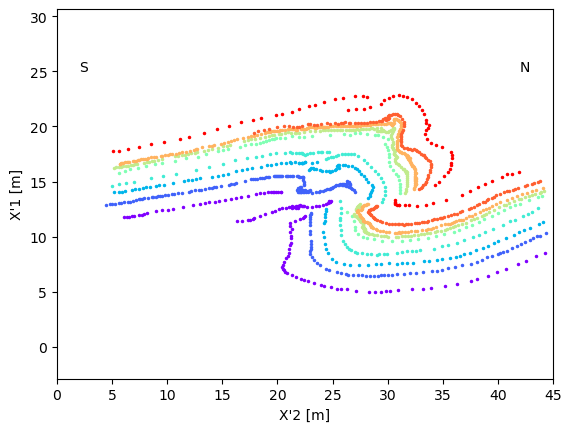

In [3]:
# construct and plot the downplunge projection of the fold

# this makes visible our functions folder
sys.path.append(os.path.abspath("../functions"))

# import our function
from down_plunge import down_plunge

# import matplotlib
import matplotlib.pyplot as plt

# trend and plunge of the fold axis
trd, plg = np.radians([261, 10])

# make a figure
fig, ax = plt.subplots()

# list of colors for layers
colors = plt.cm.rainbow(np.linspace(0, 1, n_layers))

# project and plot the layers on profile plane
for i in range(n_layers):
    # layer
    layer = layers[layers[:,3] == i]
    # project
    dp_layer = down_plunge(layer, trd, plg)
    # plot
    ax.plot(dp_layer[:,1], dp_layer[:,0], ".", markersize = 3, color=colors[i])

# axes equal, x axis limits, and axes labels
ax.axis("Equal")
ax.set_xlim(0, 45)
ax.set_xlabel("X'2 [m]")
ax.set_ylabel("X'1 [m]")

# label the orientation of the section
# the fold axis plunges west, so the left side is S and the right side is N
ax.text(2, 25, "S")
ax.text(42, 25, "N")

# show the figure
plt.show()

This is the downplunge projection of the fold 🙂